Импортируем все, что нам нужно:

In [1]:
from sklearn.datasets import load_iris
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sea

Загружаем наш датасет:

In [2]:
iris = load_iris()                                           # заргружаем наш датасет
df = pd.DataFrame(iris.data, columns=iris.feature_names)     # представляем наш датасет в виде датафрейма
df['target'] = iris.target                                   # добавляем столбец таргет в наш датафрейм
df                                                           # проверим все ли правильно сработало

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Теперь построим зависимости 'sepal length - sepal width' и 'petal length - petal width':

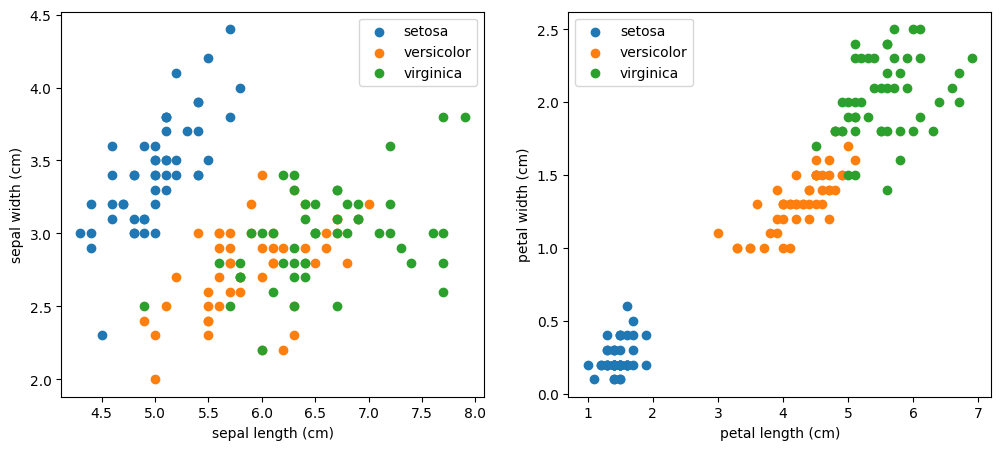

In [3]:
plt.figure(figsize=(12,5))                                           # обозначаем размер нашего графика
for j, feature in enumerate(['sepal', 'petal']):                     # строим график для каждого из лепестков
	for i, name in enumerate(iris.target_names):                     # отображаем на графике каждый из видов ирисов
		ax = plt.subplot(1, 2, j + 1)                                # выбираем график
		first = df[df['target'] == i][feature + ' length (cm)']      # выбираем определенный признак (столбец) у данного вида ириса
		second = df[df['target'] == i][feature + ' width (cm)']      # выбираем определенный признак (столбец) у данного вида ириса
		ax.scatter(first, second, label=name)                        # выбираем, какие данные изобразить на графике
		ax.set_xlabel(feature + ' length (cm)')                      # меняем название оси OX
		ax.set_ylabel(feature + ' width (cm)')                       # меняем название оси OY
		ax.legend()                                                  # добавляем легенду

Действительно, как видно из графиков setosa отделен/на от других. Теперь проделаем тоже самое с помощью seaborn.pairplot:

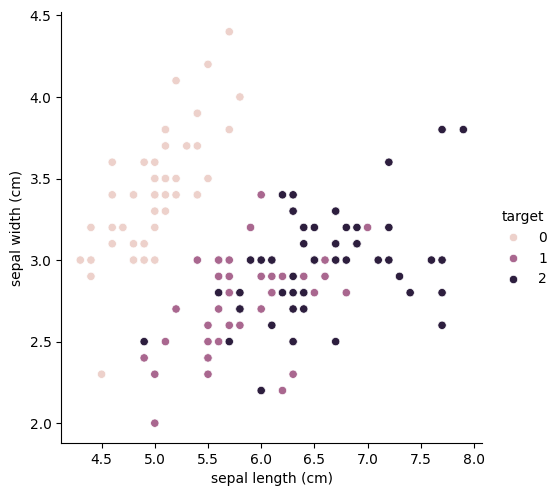

In [4]:
sea.pairplot(data=df, x_vars='sepal length (cm)', y_vars = 'sepal width (cm)', hue='target', height=5)

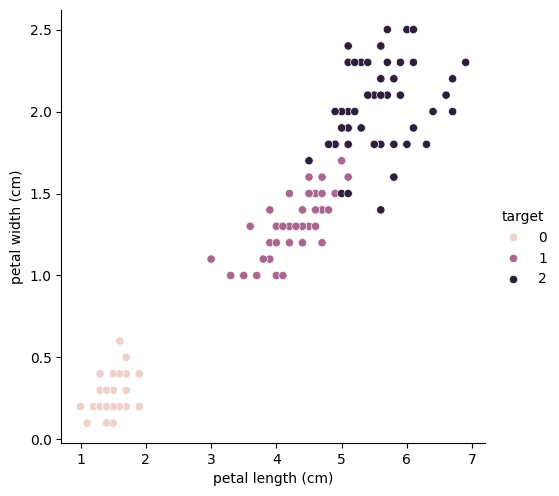

In [5]:
sea.pairplot(data=df, x_vars='petal length (cm)', y_vars='petal width (cm)', hue='target', height=5)

Теперь разобьем датасет на два: в первом останутся setosa и versicolor, во втором - versicolor и virginica:

In [6]:
df1 = df[df['target'] != 2]  # без virginica
df2 = df[df['target'] != 0]  # без setosa

Разбиваем их на обучающую и тестовую выборки и отделим целевую переменную от данных:

In [7]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(df1.drop(['target'], axis=1), df1['target'], test_size=0.4, stratify=df1['target'])  # разбиение для набора без virginica
x2_train, x2_test, y2_train, y2_test = train_test_split(df2.drop(['target'], axis=1), df2['target'], test_size=0.4, stratify=df2['target'])  # разбиение для набора без setosa

Теперь применим логистическую регрессию:

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression(random_state=0)     # берем логистическую регрессию из sklearn

Для первого датасета:

In [9]:
clf.fit(x1_train, y1_train)                              # 'обучаем' нашу регрессию
y1_pred = clf.predict(x1_test)                           # просим предсказать значения, используя логистическую регрессию
print('Точность: ', accuracy_score(y1_test, y1_pred))    # высчитываем точность для нашей регрессии

Точность:  1.0


Получили идеальное качество.

Теперь сделаем то же самое для второго датасета:

In [10]:
clf.fit(x2_train, y2_train)                              # 'обучаем' нашу регрессию
y2_pred = clf.predict(x2_test)                           # просим предсказать значения, используя логистическую регрессию
print('Точность ', accuracy_score(y2_test, y2_pred))     # высчитываем точность для нашей регрессии

Точность  0.9


Здесь качество получилось тоже довольно хорошое.
Теперь проделаем все тоже самое на созданном датасете. Сначала сгенерируем его и отобразим на графике:

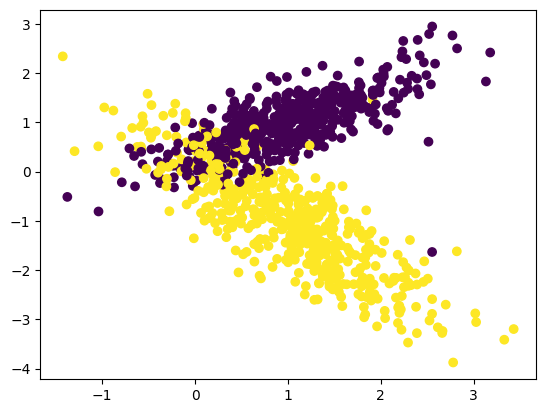

In [11]:
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1) # генерируем датасет
plt.scatter(x.T[0], x.T[1], c=y)                                                                                                # изображаем га графике наш датасет

Теперь разделяем созданный датасет на обучающую и тестовую выборки и применяем логистическую регрессию:

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y)   # разделяем на 2 выборки
clf = LogisticRegression(random_state=0)                                               # берем логистическую регрессию из sklearn
clf.fit(x_train, y_train)                                                              # 'обучаем' нашу регрессию
y_pred = clf.predict(x_test)                                                           # просим предсказать данные, используя нашу регрессию
print('Точность: ', accuracy_score(y_test, y_pred))                                    # выводим точность нашей регрессии

Точность:  0.9
